# Import All Packages/Library

In [1]:
import importlib
import helper
importlib.reload(helper)

<module 'helper' from 'c:\\Grace\\work\\`Apply\\CV_Portfolio\\Github\\3_Sales_Data_Forecasting\\helper.py'>

In [2]:
from helper import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Data Preprocessing

Read the raw data file.

In [3]:
raw_df = pd.read_csv('./data/retail_sales_synthetic.csv')
df = raw_df.copy()  # Copy to ensure every change made in this code doesn't affect the raw data.

In [4]:
# df.head()/df.describe() truncates columns.
# In order to inspect everything, we need to print in parts.
n_col = len(df.columns)

In [5]:
print('\nInitial Dataframe Head:')
print(df.head().iloc[:, :int(n_col/2)])
print(df.head().iloc[:, int(n_col/2):])


Initial Dataframe Head:
         date  store_id store_type region    city  store_area_sqft product_id  \
0  2024-09-05  store_09          C   East  city_9             2287   prod_031   
1  2022-10-24  store_02          C   East  city_2             2627   prod_041   
2  2023-04-19  store_06          B   West  city_6             2547   prod_022   
3  2024-06-22  store_06          B   West  city_6             2547   prod_037   
4  2024-07-20  store_02          C   East  city_2             2627   prod_018   

   category  base_price  final_price  discount_pct  
0      Home       43.01        43.33           0.0  
1    Sports      121.31        86.51          30.0  
2  Clothing       11.10        11.05           0.0  
3    Beauty      272.28       284.06           0.0  
4      Home       56.11        56.58           0.0  
   promotion  is_holiday  day_of_week  weekend  units_sold  returns  \
0          0           0            3        0           8        1   
1          0           1    

In [6]:
# Check the raw data information before preprocessing.
print('\nInitial Dataframe Information:')
print(df.info())


Initial Dataframe Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164400 entries, 0 to 164399
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             164400 non-null  object 
 1   store_id         164400 non-null  object 
 2   store_type       164400 non-null  object 
 3   region           164400 non-null  object 
 4   city             164400 non-null  object 
 5   store_area_sqft  164400 non-null  int64  
 6   product_id       164400 non-null  object 
 7   category         164400 non-null  object 
 8   base_price       164400 non-null  float64
 9   final_price      164400 non-null  float64
 10  discount_pct     164400 non-null  float64
 11  promotion        164400 non-null  int64  
 12  is_holiday       164400 non-null  int64  
 13  day_of_week      164400 non-null  int64  
 14  weekend          164400 non-null  int64  
 15  units_sold       164400 non-null  int64  
 16  return

In [7]:
# Check the current data numeric stats before preprocessing.
print('\nInitial Dataframe Numeric Stats:')
print(df.describe().iloc[:, :int(n_col/3)])
print(df.describe().iloc[:, int(n_col/3):])


Initial Dataframe Numeric Stats:
       store_area_sqft     base_price    final_price   discount_pct  \
count    164400.000000  164400.000000  164400.000000  164400.000000   
mean       2440.700000      48.682199      46.781269       3.884519   
std         317.638196      49.139032      47.473471       7.073051   
min        1734.000000       5.800000       3.860000       0.000000   
25%        2287.000000      17.750000      16.880000       0.000000   
50%        2570.000000      31.030000      31.100000       0.000000   
75%        2611.000000      59.100000      56.670000       5.000000   
max        2904.000000     272.280000     293.690000      30.000000   

           promotion     is_holiday    day_of_week  
count  164400.000000  164400.000000  164400.000000  
mean        0.079453       0.013686       3.000000  
std         0.270445       0.116185       2.002286  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       1.000000  
50%     

As shown above, the data is already clean and ready to use.

# EDA (Exploratory Data Analysis)

## 1. Does the presence of holiday affect overall sales and revenue, both daily and monthly?

Get the necessary columns from the preprocessed data.

In [8]:
# Each row is confirmed unique from the previous step so we can exclude the ID columns in this section.
# Copy to ensure every change made in this section doesn't affect the main data.
df_1 = df[['date','is_holiday','net_units','net_revenue']].copy()
print(df_1.head())

         date  is_holiday  net_units  net_revenue
0  2024-09-05           0          7       303.32
1  2022-10-24           1          5       432.56
2  2023-04-19           0          2        22.09
3  2024-06-22           0          1       284.06
4  2024-07-20           0          2       113.16


### Holiday Effect Towards Daily Sales and Revenue

Sum sales (units) and revenue of all stores and products each day.

In [9]:
df_1 = df_1.groupby(df_1['date']).sum()
# The line above sums all numeric data except `date` so `is_holiday` were also summed.
# However, `is_holiday` is conditional data and is better represented as binary (0 or 1) in a day-by-day data.
df_1.loc[df_1['is_holiday'] > 0, 'is_holiday'] = 1
print(df_1.head())

            is_holiday  net_units  net_revenue
date                                          
2022-01-01           0        633     32625.87
2022-01-02           0        636     31625.80
2022-01-03           0        574     30254.72
2022-01-04           0        532     26296.65
2022-01-05           0        568     25624.26


Find the mean difference percentages between variables (`is_holiday`, `net_units`, and `net_revenue`) to analyze the effect of holiday to daily sales and revenue.

In [10]:
bmd_holiday_daily = binary_mean_diff(df_1, 'is_holiday', 'both')
print(f"Effect of holiday on daily sales: {bmd_holiday_daily['sales_pct_diff']:.2f}%")
print(f"Effect of holiday on daily revenue: {bmd_holiday_daily['rev_pct_diff']:.2f}%")

Effect of holiday on daily sales: 27.60%
Effect of holiday on daily revenue: 25.45%


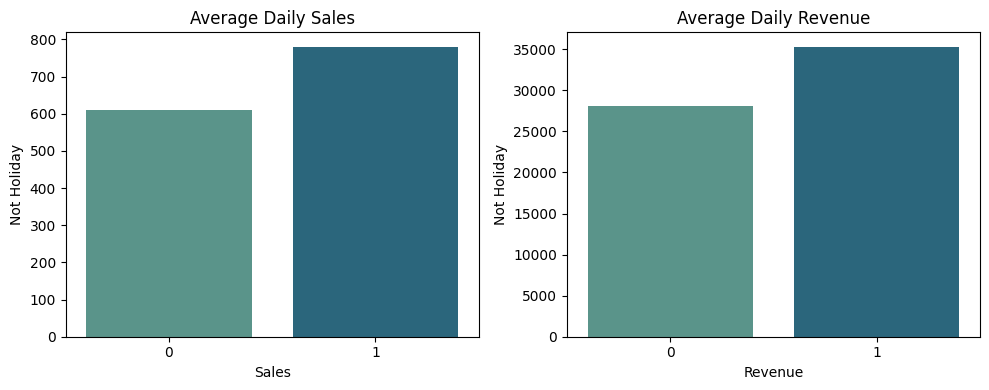

In [11]:
# Visualize results as barplot comparison.
fig, ax = plt.subplots(1, 2, figsize=(10,4))
plot_bar(df_1, 'is_holiday', 'net_units', 'Average Daily Sales', 'Sales', 'Not Holiday', 'Holiday', ax=ax[0])
plot_bar(df_1, 'is_holiday', 'net_revenue', 'Average Daily Revenue', 'Revenue', 'Not Holiday', 'Holiday', ax=ax[1])
plt.tight_layout()
plt.show()

Based on the results, holidays increase overall daily sales by 27,6% and revenue by 25,45%.

### Holiday Effect Towards Monthly Sales and Revenue

Every dates in the current data are already unique so we can erase the day in the `date` data to support monthly-based analysis process.

In [12]:
df_1.index = dtm(df_1.index)
print(df_1.head())

         is_holiday  net_units  net_revenue
date                                       
2022-01           0        633     32625.87
2022-01           0        636     31625.80
2022-01           0        574     30254.72
2022-01           0        532     26296.65
2022-01           0        568     25624.26


Group (sum) the numeric data based on `date` to earn monthly net sales and revenue.

In [13]:
df_1 = df_1.groupby(df_1.index).sum()
# In this section, `is_holiday` is no longer conditional and is expected to be summed as a representation for total holiday-days in a month.
print(df_1.head())

         is_holiday  net_units  net_revenue
date                                       
2022-01           1      18498    860972.53
2022-02           0      16240    743945.03
2022-03           1      18163    833257.90
2022-04           0      17575    830541.04
2022-05           0      18032    811823.17


Find the mean difference percentages between variables (`is_holiday`, `net_units`, and `net_revenue`) to analyze the effect of holiday to monthly sales and revenue.

In [14]:
bmd_holiday_monthly = binary_mean_diff(df_1, 'is_holiday', 'both')
print(f"Effect of holiday on monthly sales: {bmd_holiday_monthly['sales_pct_diff']:.2f}%")
print(f"Effect of holiday on monthly revenue: {bmd_holiday_monthly['rev_pct_diff']:.2f}%")

Effect of holiday on monthly sales: 6.96%
Effect of holiday on monthly revenue: 7.23%


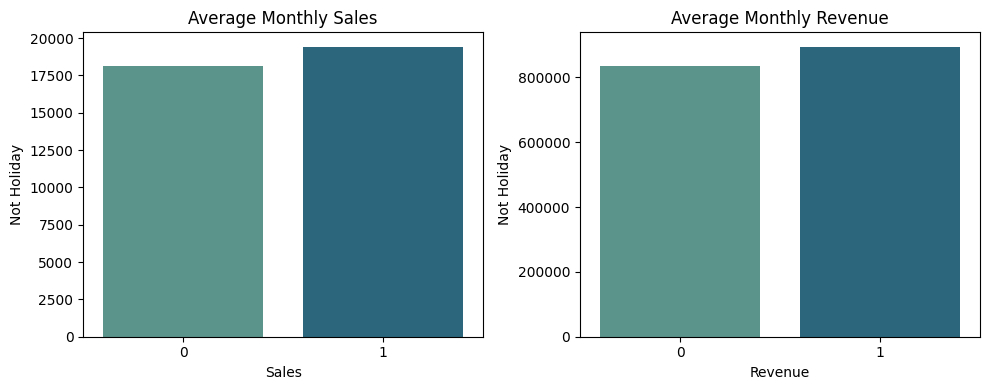

In [15]:
# Visualize results as barplot comparison.
fig, ax = plt.subplots(1, 2, figsize=(10,4))
plot_bar(df_1, 'is_holiday', 'net_units', 'Average Monthly Sales', 'Sales', 'Not Holiday', 'Holiday', ax=ax[0])
plot_bar(df_1, 'is_holiday', 'net_revenue', 'Average Monthly Revenue', 'Revenue', 'Not Holiday', 'Holiday', ax=ax[1])
plt.tight_layout()
plt.show()

Based on the results, holidays increase overall monthly sales and revenue by around 7%, less significant compared to its impact towards daily view.

## 2. Is there any change in product category trend during no-holiday months and holiday months?

Get the necessary columns from the preprocessed data.

In [16]:
# Each row is confirmed unique from the previous step so we can exclude the ID columns in this section.
# Copy to ensure every change made in this section doesn't affect the main data.
df_2 = df[['date','is_holiday','category','net_units']].copy()
print(df_2.head())

         date  is_holiday  category  net_units
0  2024-09-05           0      Home          7
1  2022-10-24           1    Sports          5
2  2023-04-19           0  Clothing          2
3  2024-06-22           0    Beauty          1
4  2024-07-20           0      Home          2


Every dates in the current data are already uniquely paired with each category so we can erase the day in the `date` data to support monthly-based analysis process.

In [17]:
df_2['date'] = dtm(df_2['date'])
print(df_2.head())

      date  is_holiday  category  net_units
0  2024-09           0      Home          7
1  2022-10           1    Sports          5
2  2023-04           0  Clothing          2
3  2024-06           0    Beauty          1
4  2024-07           0      Home          2


Count `net_units` by month and product category while keeping the `is_holiday` properties.

In [18]:
df_2 = df_2.groupby(['date', 'category'], as_index=False)[['is_holiday','net_units']].sum()
# The above line will sum `is_holiday` and `net_units` data based on unique pairs of `date` and `category`.
# However, in this section, we need `is_holiday` as a conditional data so it is better represented as binary (0 or 1).
df_2.loc[df_2['is_holiday'] > 0, 'is_holiday'] = 1
print(df_2.head())

      date     category  is_holiday  net_units
0  2022-01       Beauty           1       1670
1  2022-01     Clothing           1       6177
2  2022-01  Electronics           1       3936
3  2022-01         Home           1       5372
4  2022-01       Sports           1       1343


Only returns the highest sales product category for each month.

In [19]:
df_2 = df_2.loc[df_2.groupby('date')['net_units'].idxmax()]
print(df_2.head())

       date  category  is_holiday  net_units
1   2022-01  Clothing           1       6177
6   2022-02  Clothing           0       5343
11  2022-03  Clothing           1       6203
16  2022-04  Clothing           0       6069
21  2022-05  Clothing           0       6079


Return the mode of top categories across holiday and non-holiday months.

In [20]:
df_2 = df_2.groupby('is_holiday')['category'].agg(lambda x: x.mode()[0])
print(df_2.head())

is_holiday
0    Clothing
1    Clothing
Name: category, dtype: object


As seen in the two latest dataframes, there's no change in product category trend during no-holiday months and holiday months. Both product category trends are clothing.

## 3. Does the weekend status affect overall daily sales and revenue?

Get the necessary columns from the preprocessed data.

In [21]:
# Each row is confirmed unique from the previous step so we can exclude the ID columns in this section.
# Copy to ensure every change made in this section doesn't affect the main data.
df_3 = df[['date','weekend','net_units','net_revenue']].copy()
print(df_3.head())

         date  weekend  net_units  net_revenue
0  2024-09-05        0          7       303.32
1  2022-10-24        0          5       432.56
2  2023-04-19        0          2        22.09
3  2024-06-22        1          1       284.06
4  2024-07-20        1          2       113.16


Sum sales (units) and revenue of all stores and products each day.

In [22]:
df_3 = df_3.groupby(df_3['date']).sum()
# The line above sums all numeric data except `date` so `weekend` were also summed.
# However, `weekend` is conditional data and is better represented as binary (0 or 1) in a day-by-day data.
df_3.loc[df_3['weekend'] > 0, 'weekend'] = 1
print(df_3.head())

            weekend  net_units  net_revenue
date                                       
2022-01-01        1        633     32625.87
2022-01-02        1        636     31625.80
2022-01-03        0        574     30254.72
2022-01-04        0        532     26296.65
2022-01-05        0        568     25624.26


Find the mean difference percentages between variables (`weekend`, `net_units`, and `net_revenue`) to analyze the effect of weekend to daily sales and revenue.

In [23]:
bmd_weekend = binary_mean_diff(df_3, 'weekend', 'both')
print(f"Effect of weekend on daily sales: {bmd_weekend['sales_pct_diff']:.2f}%")
print(f"Effect of weekend on daily revenue: {bmd_weekend['rev_pct_diff']:.2f}%")

Effect of weekend on daily sales: 22.75%
Effect of weekend on daily revenue: 22.68%


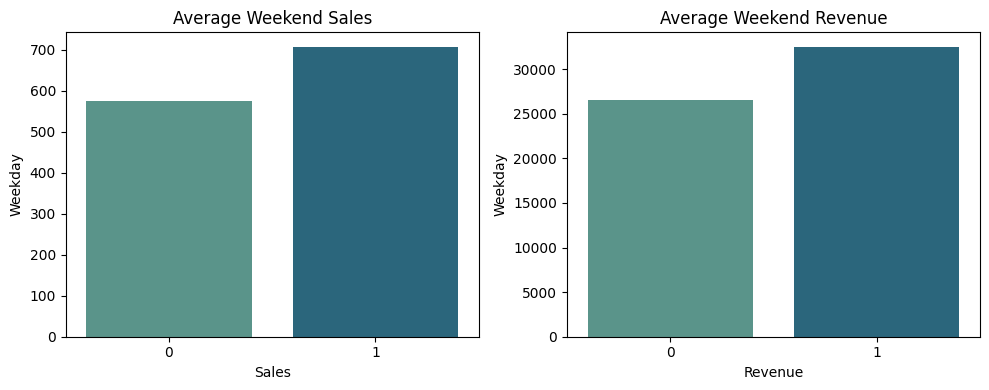

In [24]:
# Visualize results as barplot comparison.
fig, ax = plt.subplots(1, 2, figsize=(10,4))
plot_bar(df_3, 'weekend', 'net_units', 'Average Weekend Sales', 'Sales', 'Weekday', 'Weekend', ax=ax[0])
plot_bar(df_3, 'weekend', 'net_revenue', 'Average Weekend Revenue', 'Revenue', 'Weekday', 'Weekend', ax=ax[1])
plt.tight_layout()
plt.show()

Based on the results, the weekend increase overall daily sales and revenue by around 22.7%, a big number but still less significant than holiday.

## 4. How is the overall day-by-day sales and revenue trend during a week?

Get the necessary columns from the preprocessed data.

In [25]:
# Each row is confirmed unique from the previous step so we can exclude the ID columns in this section.
# Because this section analyze day or `day_of_week` instead of `date`, we can also exclide the `date` column.
# Copy to ensure every change made in this section doesn't affect the main data.
df_4 = df[['day_of_week','net_units','net_revenue']].copy()
print(df_4.head())

   day_of_week  net_units  net_revenue
0            3          7       303.32
1            0          5       432.56
2            2          2        22.09
3            5          1       284.06
4            5          2       113.16


Find the average values of sales and revenue for each day of the week.

In [26]:
df_4 = df_4.groupby(df_4['day_of_week']).mean()
print(df_4)

             net_units  net_revenue
day_of_week                        
0             3.825563   177.054874
1             3.819278   175.540487
2             3.849615   176.279568
3             3.831197   175.841911
4             3.873120   178.832584
5             4.691125   214.380471
6             4.735329   219.188544


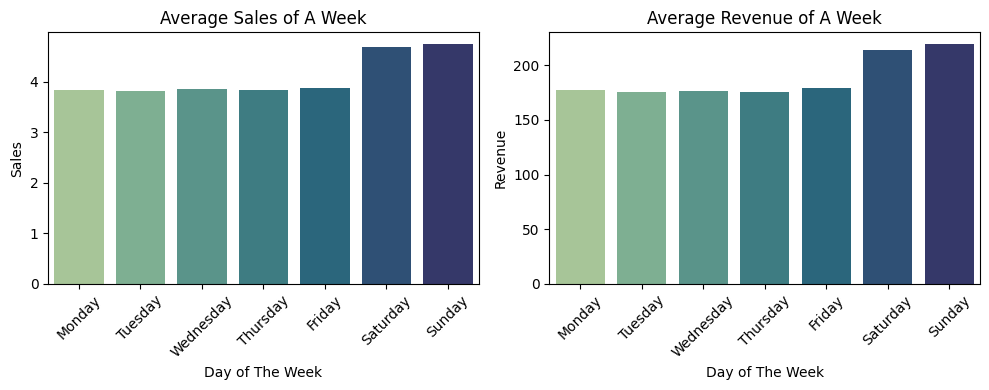

In [27]:
# Visualize results as barplot comparison.
fig, ax = plt.subplots(1, 2, figsize=(10,4))

sns.barplot(
        data=df, x='day_of_week', y='net_units', ax=ax[0],
        errorbar=None, legend=False,
        hue='day_of_week', palette='crest'
    )
ax[0].set_title('Average Sales of A Week')
ax[0].set_xlabel('Day of The Week')
ax[0].set_ylabel('Sales')
ax[0].set_xticks(
    [0, 1, 2, 3, 4, 5, 6], 
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    rotation=45
)

sns.barplot(
        data=df, x='day_of_week', y='net_revenue', ax=ax[1],
        errorbar=None, legend=False,
        hue='day_of_week', palette='crest'
    )
ax[1].set_title('Average Revenue of A Week')
ax[1].set_xlabel('Day of The Week')
ax[1].set_ylabel('Revenue')
ax[1].set_xticks(
    [0, 1, 2, 3, 4, 5, 6], 
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    rotation=45
)

plt.tight_layout()
plt.show()

The results show that sales and revenue are higher during weekends. This shows a consistent result between this section and previous section, the weekend status affects the overall daily sales and revenue.

## 5. Does the store type and area affect customer experience and, in turn, store sales?

Get the necessary columns from the preprocessed data.

In [28]:
# Each row is confirmed unique from the previous step so we can exclude the `date` and ID columns in this section.
# Copy to ensure every change made in this section doesn't affect the main data.
df_5 = df[['store_type','store_area_sqft','avg_rating','net_units','net_revenue']].copy()
print(df_5.head())

  store_type  store_area_sqft  avg_rating  net_units  net_revenue
0          C             2287        3.41          7       303.32
1          C             2627        3.59          5       432.56
2          B             2547        3.86          2        22.09
3          B             2547        4.71          1       284.06
4          C             2627        3.86          2       113.16


Find the average values of customer experiences, sales, and revenue for each store type and area.

In [29]:
df_5 = df_5.groupby(['store_type', 'store_area_sqft'], as_index=False)[['avg_rating','net_units','net_revenue']].mean()
print(df_5)

  store_type  store_area_sqft  avg_rating  net_units  net_revenue
0          A             1734    3.972809   4.283577   196.241209
1          A             2593    3.964456   4.324088   200.346071
2          A             2596    3.968857   4.059367   186.223064
3          B             2547    3.965058   3.888564   175.711395
4          C             2055    3.968860   4.095438   190.132041
5          C             2287    3.968108   3.859124   178.184290
6          C             2453    3.968673   4.051886   186.245386
7          C             2611    3.970072   3.870073   177.580783
8          C             2627    3.965832   4.363808   202.385544
9          C             2904    3.974178   4.103771   188.853874


### Store Type Effect Towards Average Customer Experiences, Sales, and Revenue

Find the average values of customer experiences, sales, and revenue for each store type only.

In [30]:
df_5_type = df_5.drop(columns='store_area_sqft').copy()
df_5_type = df_5_type.groupby(df_5_type['store_type']).mean()
print(df_5_type)

            avg_rating  net_units  net_revenue
store_type                                    
A             3.968707   4.222344   194.270115
B             3.965058   3.888564   175.711395
C             3.969287   4.057350   187.230320


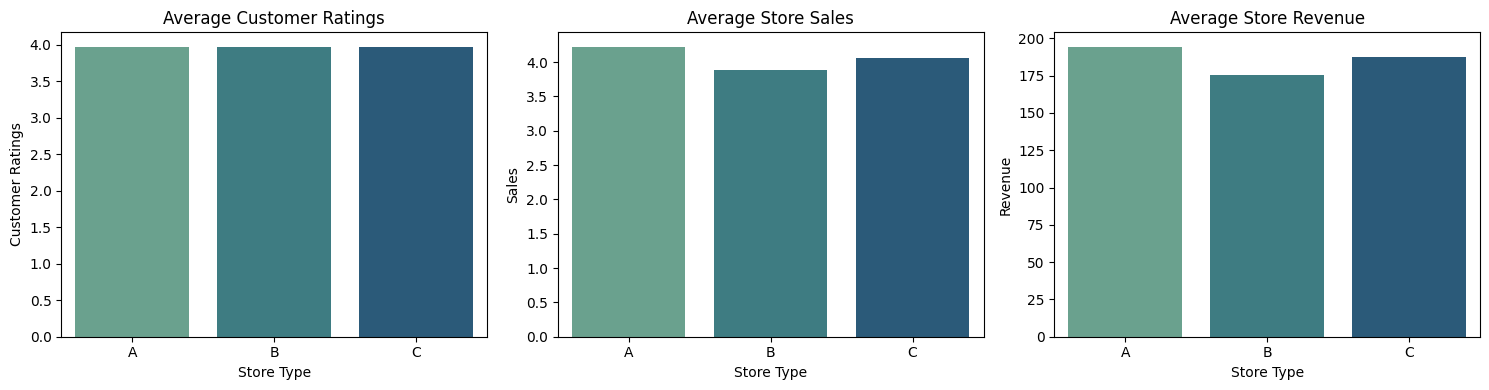

In [31]:
# Visualize results as barplot comparison.
fig, ax = plt.subplots(1, 3, figsize=(15,4))
plot_bar(df_5_type, 'store_type', 'avg_rating', 'Average Customer Ratings', xlabel='Store Type', ylabel='Customer Ratings', ax=ax[0])
plot_bar(df_5_type, 'store_type', 'net_units', 'Average Store Sales', xlabel='Store Type', ylabel='Sales', ax=ax[1])
plot_bar(df_5_type, 'store_type', 'net_revenue', 'Average Store Revenue', xlabel='Store Type', ylabel='Revenue', ax=ax[2])
plt.tight_layout()
plt.show()

Store type shows clear differences in sales and revenue, while customer ratings vary little by type. Store type C has the highest rank, but store type A has the highest net sales and revenue.

### Store Area (in sqft) Effect Towards Average Customer Experiences, Sales, and Revenue

Find the correlation coefficients between `store_area_sqft`, `avg_rating`, `net_units`, and `net_revenue`.

In [32]:
df_5_area = df_5[['store_area_sqft', 'avg_rating', 'net_units', 'net_revenue']].corr()
print(df_5_area)

                 store_area_sqft  avg_rating  net_units  net_revenue
store_area_sqft         1.000000   -0.174085  -0.132697    -0.125751
avg_rating             -0.174085    1.000000  -0.065062    -0.070525
net_units              -0.132697   -0.065062   1.000000     0.990896
net_revenue            -0.125751   -0.070525   0.990896     1.000000


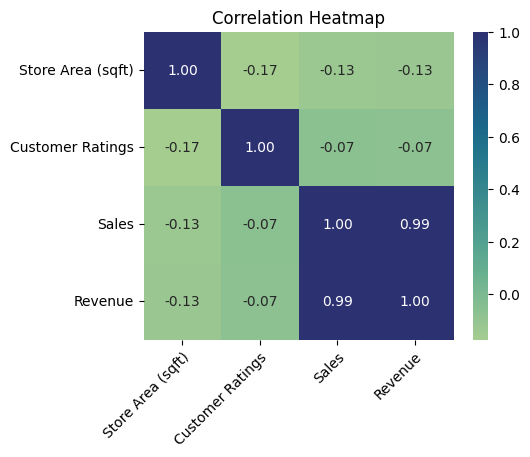

In [33]:
# Visualize results as heatmap correlation.
plt.figure(figsize=(5,4))
sns.heatmap(df_5_area, annot=True, cmap='crest', fmt=".2f")
plt.title('Correlation Heatmap')
plt.xticks(np.arange(df_5_area.shape[1]) + 0.5, ['Store Area (sqft)', 'Customer Ratings', 'Sales', 'Revenue'], rotation=45, ha='right', rotation_mode='anchor')
plt.yticks(np.arange(df_5_area.shape[0]) + 0.5, ['Store Area (sqft)', 'Customer Ratings', 'Sales', 'Revenue'], va='center')
plt.show()

The results above show that store area doesn't significantly affect customer experience, sales, or revenue. Interestingly, larger store areas exhibit a negative correlation with ratings, sales, and revenue, suggesting that bigger spaces might not necessarily lead to higher customer satisfaction. In addition, customer experience also doesn't significantly affect sales or revenue and even shows a negative correlation, meaning that higher ratings are associated with lower sales and revenue.

## 6. Which category of product is the most popular in each city month-by-month?

Get the necessary columns from the preprocessed data.

In [34]:
# Each row is confirmed unique from the previous step so we can exclude the `date` and ID columns in this section.
# Copy to ensure every change made in this section doesn't affect the main data.
df_6 = df[['date','city','category','net_units']].copy()
print(df_6.head())

         date    city  category  net_units
0  2024-09-05  city_9      Home          7
1  2022-10-24  city_2    Sports          5
2  2023-04-19  city_6  Clothing          2
3  2024-06-22  city_6    Beauty          1
4  2024-07-20  city_2      Home          2


Every dates in the current data are already uniquely paired with each category so we can erase the day in the `date` data to support monthly-based analysis process.

In [35]:
df_6['date'] = dtm(df_6['date'])
print(df_6.head())

      date    city  category  net_units
0  2024-09  city_9      Home          7
1  2022-10  city_2    Sports          5
2  2023-04  city_6  Clothing          2
3  2024-06  city_6    Beauty          1
4  2024-07  city_2      Home          2


Count `net_units` by month and product category while keeping the `city` data.

In [36]:
df_6 = df_6.groupby(['date', 'category','city'], as_index=False)[['net_units']].sum()
df_6['city'] = df_6['city'].str.replace(r'city_(\d)$', r'city_0\1', regex=True)
# The above line will sum `net_units` data based on unique pairs of `date`, `category`, and 'city'.
print(df_6.head())

      date category     city  net_units
0  2022-01   Beauty  city_01        176
1  2022-01   Beauty  city_10        151
2  2022-01   Beauty  city_02        150
3  2022-01   Beauty  city_03        163
4  2022-01   Beauty  city_04        181


Separate data by city to support city-based analysis process and to ensure every store carries equal weights.

In [37]:
city_dfs = {}
separate(df_6, city_dfs, 'city')

Returns the highest sales product category for each pair of month and place.

In [38]:
for city, df_city in city_dfs.items():
    df_city = df_city.loc[df_city.groupby(['date'])['net_units'].idxmax()]
    city_dfs[city] = df_city
    # print(city,':\n',df_city.head())

To simplify pattern analysis, we can group by continuous segments with the same category as below.

In [39]:
for city, df_city in city_dfs.items():
    df_city_series = series_group(df_city, 'category', 'net_units')
    print(city,':\n',df_city_series)

city_01 :
                 date  category  total_item
0  2022-01 - 2023-10  Clothing       13692
1  2023-11 - 2023-12      Home        1635
2  2024-01 - 2024-07  Clothing        4166
3  2024-08 - 2024-08      Home         557
4  2024-09 - 2024-12  Clothing        2909
city_02 :
                 date  category  total_item
0  2022-01 - 2023-05  Clothing       11722
1  2023-06 - 2023-06      Home         546
2  2023-07 - 2023-08  Clothing        1194
3  2023-09 - 2023-09      Home         660
4  2023-10 - 2024-11  Clothing        9768
5  2024-12 - 2024-12      Home         947
city_03 :
                 date  category  total_item
0  2022-01 - 2022-01      Home         556
1  2022-02 - 2022-04  Clothing        1559
2  2022-05 - 2022-06      Home        1018
3  2022-07 - 2023-02  Clothing        4961
4  2023-03 - 2023-03      Home         561
5  2023-04 - 2023-11  Clothing        4745
6  2023-12 - 2023-12      Home         788
7  2024-01 - 2024-07  Clothing        4046
8  2024-08 - 2024-08 

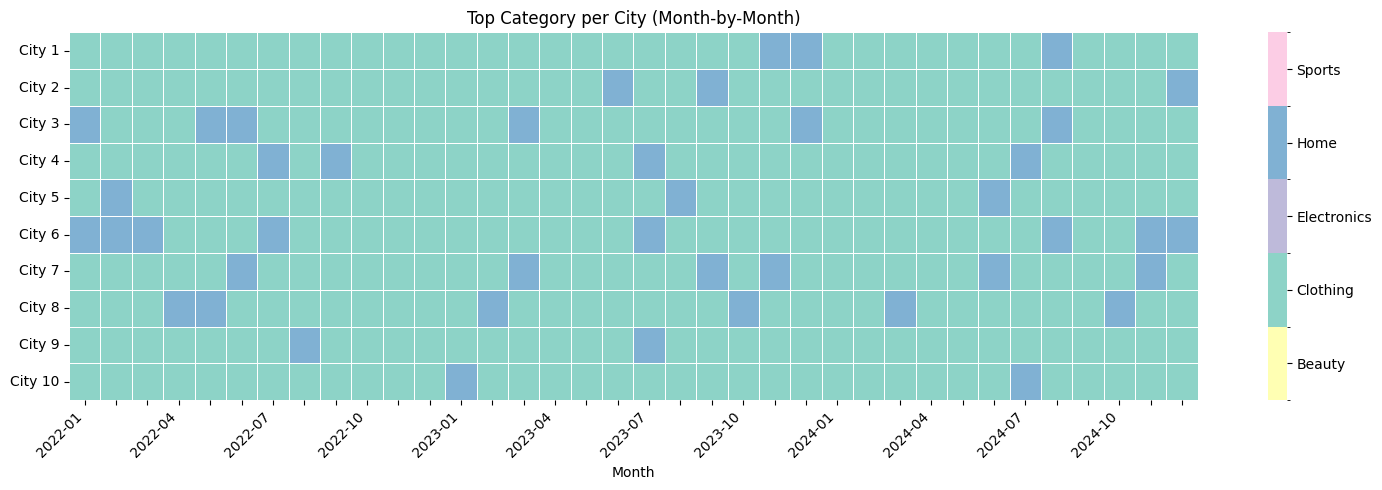

In [40]:
# Visualize results as heatmap correlation.
# Regroup dictionary to a DataFrame.
df_cities = dfs_to_df(city_dfs, 'city')
months = sorted(
    df_cities['date'].unique(),
    key=lambda s: pd.to_datetime(s + '-01', errors='coerce')
)

# Category mapping.
# Use complete category from initial data.
cats = list(pd.unique(df_6['category']))
cat_dtype = pd.api.types.CategoricalDtype(categories=cats, ordered=False)
df_cities['category'] = df_cities['category'].astype(cat_dtype)
df_cities['cat_code'] = df_cities['category'].cat.codes  

pivot = (
    df_cities
      .pivot(index='city', columns='date', values='cat_code')
      .reindex(columns=months)           
      .sort_index()
)
n_cats = len(cats)
n_city = len(pivot)

# Color palette settings.
main_palette = sns.color_palette('Set3', 12)
palette = [main_palette[i] for i in [1,0,2,4,7]]
cmap = mcolors.ListedColormap(palette)
bounds = np.arange(n_cats + 1) - 0.5
norm = mcolors.BoundaryNorm(bounds, cmap.N)

plt.figure(figsize=(15, 5))
ax = sns.heatmap(
    pivot, 
    cmap=cmap, norm=norm, cbar=True,
    linewidths=0.5, linecolor='white'
)
ax.set_title('Top Category per City (Month-by-Month)')
ax.set_xlabel('Month')
ax.set_ylabel('')

# Month label (xticks) settings.
for i, tick in enumerate(ax.get_xticklabels()):
    show_every = max(1, len(months)//12)
    tick.set_visible(i % show_every == 0)

# Legend settings.
cbar = ax.collections[0].colorbar
cbar.set_ticks(np.arange(n_cats))
cbar.set_ticklabels(cats)

# Ticks settings.
plt.xticks(rotation=45, ha='right')
plt.yticks(
    # [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] + 0.5,
    np.arange(n_city) + 0.5,
    ['City 1','City 2', 'City 3', 'City 4', 'City 5', 'City 6', 'City 7', 'City 8', 'City 9', 'City 10'],
    rotation='horizontal')

plt.tight_layout()
plt.show()

As shown above, each city shows different trends and preferences over time. However, the top product category across those months and cities are always whether **Clothing** or **Home**.

## 7. How does discount percentages on products affect store's sales and revenue?

Get the necessary columns from the preprocessed data.

In [41]:
# Each row is confirmed unique from the previous step so we can exclude the `date` in this section.
# Discount percentage applies to one specific product and the product is not always on discount.
# Therefore, we need to include product ID data and analyze the effect for each product
# Copy to ensure every change made in this section doesn't affect the main data.
df_7 = df[['product_id','discount_pct','net_units','net_revenue']].copy()
print(df_7.head())

  product_id  discount_pct  net_units  net_revenue
0   prod_031           0.0          7       303.32
1   prod_041          30.0          5       432.56
2   prod_022           0.0          2        22.09
3   prod_037           0.0          1       284.06
4   prod_018           0.0          2       113.16


In [42]:
# Check number of unique discount percentages to determine analysis approach.
print(df_7[['discount_pct']].nunique())

discount_pct    6
dtype: int64


Separate data by product ID to support product-based analysis process and to ensure every product carries equal weights.

In [43]:
disc_dfs = {}
separate(df_7, disc_dfs, 'product_id')

In [44]:
# Output examples.
print('prod_031:\n',disc_dfs['prod_031'].head())
print('prod_041:\n',disc_dfs['prod_041'].head())
print('prod_022:\n',disc_dfs['prod_022'].head())

prod_031:
        discount_pct  net_units  net_revenue
98618           0.0          1        44.42
98619           0.0          5       214.38
98620           0.0          4       173.08
98621           0.0         10       429.38
98622           0.0          4       177.32
prod_041:
         discount_pct  net_units  net_revenue
131632          30.0          4       344.74
131633           0.0          3       364.89
131634           0.0          3       366.98
131635           0.0          2       247.80
131636          15.0          3       314.60
prod_022:
        discount_pct  net_units  net_revenue
68855           0.0          6        66.35
68856           0.0          4        44.94
68857           5.0          1        10.55
68858           0.0          3        35.00
68859           0.0          6        66.67


Calculate average sales and revenue for each level discount in each product.

In [45]:
for prod_id, df_disc in disc_dfs.items():
    df_disc = df_disc.groupby('discount_pct')[['net_units', 'net_revenue']].mean()
    disc_dfs[prod_id] = df_disc
    # print('\n',prod_id,':\n',disc_dfs[prod_id])

Find the mean difference percentages between variables (`discount_pct`, `net_units`, and `net_revenue`) to analyze the effect of discount to product sales and revenue.  
**Note:** The mean difference percentages are compared to baseline.

In [46]:
disc_dfs_mdiff = disc_dfs.copy()
# print('Mean Difference Pencentages of Each Product:')
for prod_id, df_disc in disc_dfs_mdiff.items():
    df_disc = df_base_diff(df_disc)
    disc_dfs_mdiff[prod_id] = df_disc
    # print('\n',prod_id,':\n',disc_dfs_mdiff[prod_id])

In [47]:
# Visualize results as heatmap (Part 1).
# Regroup dictionary to a DataFrame.
df_discs = dfs_to_df(disc_dfs, 'prod_id', index_name='discount_pct')

print(df_discs.head())

    prod_id  discount_pct  net_units  net_revenue
0  prod_001           0.0   5.294933    53.818350
1  prod_001           5.0   5.016064    48.410763
2  prod_001          10.0   5.713333    52.264733
3  prod_001          15.0   5.489474    47.340105
4  prod_001          20.0   5.280193    43.018696


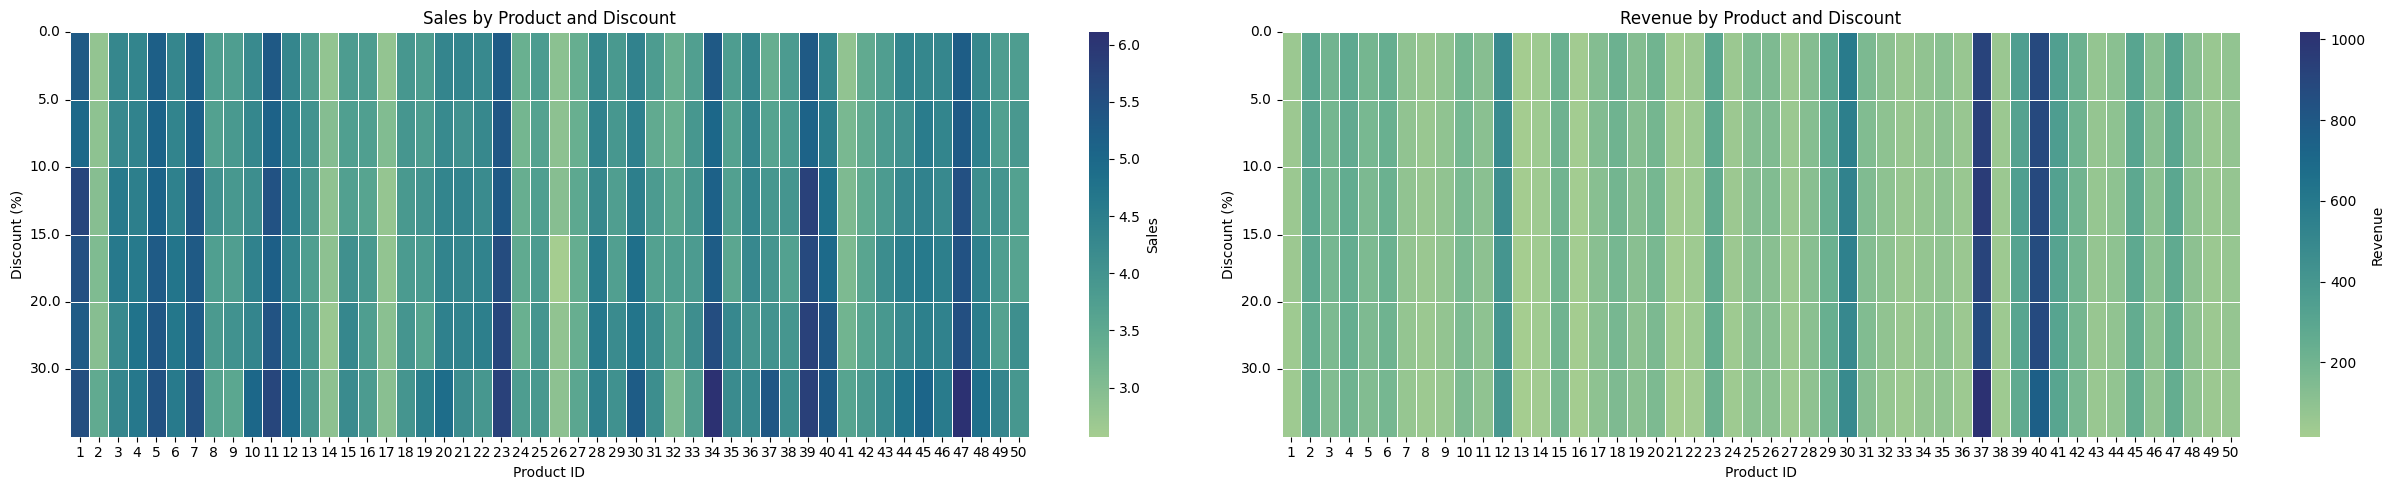

In [48]:
# Visualize results as heatmap (Part 2).
pivot_sales = (
    df_discs
      .pivot(index='discount_pct', columns='prod_id', values='net_units')
)
pivot_rev = (
    df_discs
      .pivot(index='discount_pct', columns='prod_id', values='net_revenue')
)

fig, ax = plt.subplots(1, 2, figsize=(25,5))
# Sales Heatmap
sns.heatmap(
    pivot_sales, ax=ax[0],
    cmap='crest', 
    cbar=True, cbar_kws={'label': 'Sales'},
    linewidths=0.5, linecolor='white',
)
ax[0].set_title('Sales by Product and Discount')
ax[0].set_xlabel('Product ID')
ax[0].set_ylabel('Discount (%)')
# Ticks settings.
ax[0].set_xticks(np.arange(50) + 0.5)
ax[0].set_xticklabels(np.arange(1, 51), rotation='horizontal', ha='center')
ax[0].set_yticks(
    np.arange(len(pivot_sales.index)),
    pivot_sales.index,
    rotation='horizontal', va='center')

# Revenue Heatmap
sns.heatmap(
    pivot_rev, ax=ax[1],
    cmap='crest', 
    cbar=True, cbar_kws={'label': 'Revenue'},
    linewidths=0.5, linecolor='white'
)
ax[1].set_title('Revenue by Product and Discount')
ax[1].set_xlabel('Product ID')
ax[1].set_ylabel('Discount (%)')
# Ticks settings.
ax[1].set_xticks(np.arange(50) + 0.5)
ax[1].set_xticklabels(np.arange(1, 51), rotation='horizontal', ha='center')
ax[1].set_yticks(
    np.arange(len(pivot_rev.index)),
    pivot_rev.index,
    rotation='horizontal', va='center')

plt.tight_layout()
plt.show()

Average mean difference percentages to find general insights.

In [49]:
disc_mat = []

avg_disc_df = avg_dfitem(prod_id, df_disc, disc_dfs_mdiff, disc_mat)
print(avg_disc_df)

              net_units  net_revenue
discount_pct                        
0.0            0.000000     0.000000
5.0            0.466972    -4.547384
10.0           2.178002    -8.035166
15.0           2.981859   -12.461796
20.0           4.744159   -16.200631
30.0           8.813126   -23.804543


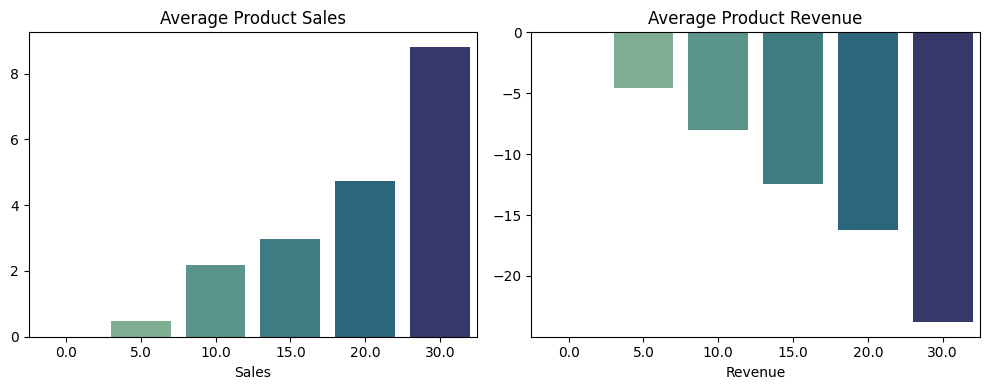

In [50]:
# Visualize results as barplot comparison.
fig, ax = plt.subplots(1, 2, figsize=(10,4))
plot_bar(avg_disc_df, 'discount_pct', 'net_units', 'Average Product Sales', 'Sales', ax=ax[0])
plot_bar(avg_disc_df, 'discount_pct', 'net_revenue', 'Average Product Revenue', 'Revenue', ax=ax[1])
plt.tight_layout()
plt.show()

As shown above, discount percentages slightly impact sales and revenue. The higher the discount percentages, the higher the sales is. However, by percentages, it is inversely proportional to the revenue, though by amount the impact doesn't show much.

## 8. How does product's promotion affect store's sales and revenue?

Get the necessary columns from the preprocessed data.

In [51]:
# Each row is confirmed unique from the previous step so we can exclude the `date` in this section.
# Promotion applies to one specific product and the product is not always on promotion.
# Therefore, we need to include product ID data and analyze the effect for each product
# Copy to ensure every change made in this section doesn't affect the main data.
df_8 = df[['product_id','promotion','net_units','net_revenue']].copy()
print(df_8.head())

  product_id  promotion  net_units  net_revenue
0   prod_031          0          7       303.32
1   prod_041          0          5       432.56
2   prod_022          0          2        22.09
3   prod_037          0          1       284.06
4   prod_018          0          2       113.16


Separate data by product ID to support product-based analysis process and to ensure every product carries equal weights.

In [52]:
promo_dfs = {}
separate(df_8, promo_dfs, 'product_id')

In [53]:
# Output examples.
print('prod_031:\n',promo_dfs['prod_031'].head())
print('prod_041:\n',promo_dfs['prod_041'].head())
print('prod_022:\n',promo_dfs['prod_022'].head())

prod_031:
        promotion  net_units  net_revenue
98618          0          1        44.42
98619          0          5       214.38
98620          0          4       173.08
98621          1         10       429.38
98622          0          4       177.32
prod_041:
         promotion  net_units  net_revenue
131632          0          4       344.74
131633          0          3       364.89
131634          0          3       366.98
131635          0          2       247.80
131636          0          3       314.60
prod_022:
        promotion  net_units  net_revenue
68855          0          6        66.35
68856          0          4        44.94
68857          0          1        10.55
68858          0          3        35.00
68859          0          6        66.67


Find the mean difference percentages between variables (`promotion`, `net_units`, and `net_revenue`) to analyze the effect of promotion to product sales and revenue.

In [54]:
promo_dfs_mdiff = promo_dfs.copy()
print("Effect of Promotion to Each Product's Sales and Revenue by Mean Difference Percentages:")
for prod_id, df_promo in promo_dfs_mdiff.items():
    df_promo = binary_mean_diff(df_promo, 'promotion', 'both')
    df_promo = pd.DataFrame([df_promo])
    promo_dfs_mdiff[prod_id] = df_promo

promo_mdiffs = dfs_to_df(promo_dfs_mdiff, 'prod_id')
print(promo_mdiffs.head())

Effect of Promotion to Each Product's Sales and Revenue by Mean Difference Percentages:
    prod_id  sales_pct_diff  rev_pct_diff
0  prod_001       63.674856     63.282240
1  prod_002       81.840155     80.695117
2  prod_003       61.796895     60.611973
3  prod_004       63.897326     65.220365
4  prod_005       60.728803     60.707296


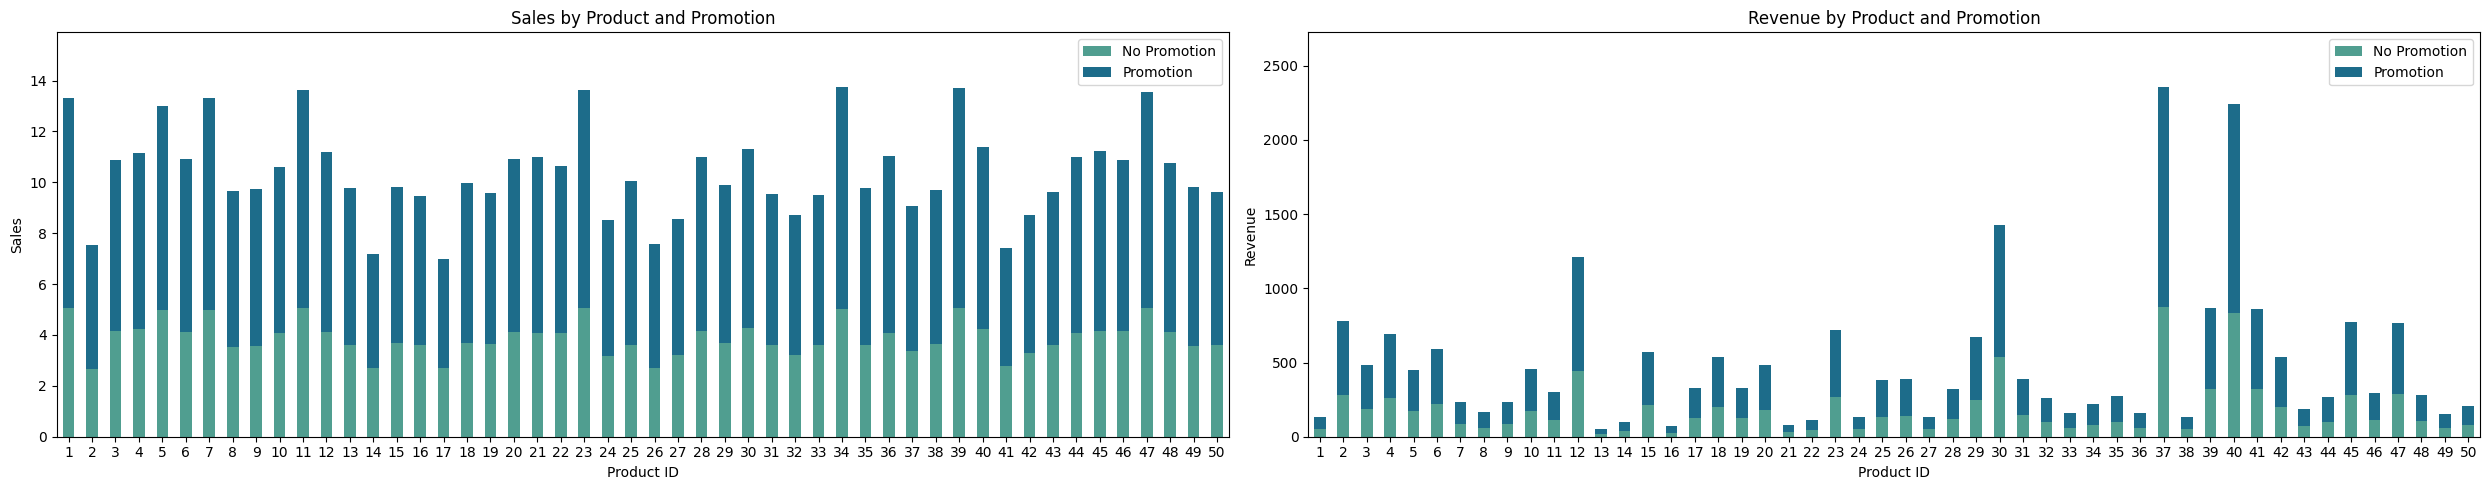

In [55]:
# Visualize results as stacked bar plot.
pivot_sales = (
    df_8.groupby(['product_id', 'promotion'])[['net_units']]
      .mean()
      .unstack(fill_value=0)
)
pivot_sales.columns = ['No Promotion', 'Promotion']

pivot_rev = (
    df_8.groupby(['product_id', 'promotion'])[['net_revenue']]
      .mean()
      .unstack(fill_value=0)
)
pivot_rev.columns = ['No Promotion', 'Promotion']

fig, ax = plt.subplots(1, 2, figsize=(25,5))

# Sales stacked bar plot.
plot_stackedbar(
    pivot_sales,
    'Sales by Product and Promotion', 
    'Product ID', 'Sales',
    50, ax=ax[0])

# Revenue stacked bar plot.
plot_stackedbar(
    pivot_rev,
    'Revenue by Product and Promotion', 
    'Product ID', 'Revenue',
    50, ax=ax[1])

plt.tight_layout()
plt.show()

Calculate average mean difference percentages for each product.

In [56]:
promo_mat = []

avg_promo_df = avg_dfitem(prod_id, df_promo, promo_dfs_mdiff, promo_mat)
print(f"Average effect of promotion on product sales: {avg_promo_df['sales_pct_diff'][0]:.2f}%")
print(f"Average effect of promotion on product revenue: {avg_promo_df['rev_pct_diff'][0]:.2f}%")

Average effect of promotion on product sales: 67.77%
Average effect of promotion on product revenue: 67.91%


As shown above, promotion significantly affects sales and revenue. Its impact is far greater than that of discount percentages—around 67.8%. Moreover, promotion has a directly proportional relationship with both sales and revenue, where the presence of promotion consistently leads to higher values in both.

## 9. How does the combination of discount and promotion give different effect to store's sales and revenue?

Get the necessary columns from the preprocessed data.

In [57]:
# Each row is confirmed unique from the previous step so we can exclude the `date` in this section.
# Promotion applies to one specific product and the product is not always on promotion.
# Therefore, we need to include product ID data and analyze the effect for each product
# Copy to ensure every change made in this section doesn't affect the main data.
df_9 = df[['product_id','discount_pct','promotion','net_units','net_revenue']].copy()
print(df_9.head())

  product_id  discount_pct  promotion  net_units  net_revenue
0   prod_031           0.0          0          7       303.32
1   prod_041          30.0          0          5       432.56
2   prod_022           0.0          0          2        22.09
3   prod_037           0.0          0          1       284.06
4   prod_018           0.0          0          2       113.16


To analyze how the combination of discount and promotion gives different effect to store's sales and revenue, we need to pair each discount and promotion in categories.

From the data preprocessing section, we already knew that the discount percentage value ranges from 0-30%. We will group these value into four categories: `no_disc`, `low_disc`, `mid_disc`, and `high_disc`. Meanwhile, the promotion value represents in a binary condition so there are only two categories: `no_promo` and `promo`.

In [58]:
df_9['disc_group'] = pd.cut(df_9['discount_pct'], bins=[-1, 0, 10, 20, 30], labels=['no_disc', 'low_disc', 'mid_disc', 'high_disc'])
df_9['promo_group'] = df_9['promotion'].map({0: 'no_promo', 1: 'promo'})
print(df_9.head())

  product_id  discount_pct  promotion  net_units  net_revenue disc_group  \
0   prod_031           0.0          0          7       303.32    no_disc   
1   prod_041          30.0          0          5       432.56  high_disc   
2   prod_022           0.0          0          2        22.09    no_disc   
3   prod_037           0.0          0          1       284.06    no_disc   
4   prod_018           0.0          0          2       113.16    no_disc   

  promo_group  
0    no_promo  
1    no_promo  
2    no_promo  
3    no_promo  
4    no_promo  


Separate data by product ID to support product-based analysis process and to ensure every product carries equal weights.

In [59]:
comb_dfs = {}
separate(df_9, comb_dfs, 'product_id')

for prod_id, df_comb in comb_dfs.items():
    df_comb = df_comb.drop(columns=['discount_pct','promotion'])
    # We will do a cross group analysis process for each product, averaging values of sales and revenue for each combination of discount and promotion.
    df_comb = df_comb.groupby(['disc_group', 'promo_group'], observed=True)[['net_units', 'net_revenue']].mean()
    comb_dfs[prod_id] = df_comb

In [60]:
# Output examples.
print('prod_031:\n',comb_dfs['prod_031'])
print('prod_041:\n',comb_dfs['prod_041'])
print('prod_022:\n',comb_dfs['prod_022'])

prod_031:
                         net_units  net_revenue
disc_group promo_group                        
no_disc    no_promo      3.617972   155.481581
           promo         5.837563   250.939492
low_disc   no_promo      3.478261   138.387022
           promo         5.463415   218.210732
mid_disc   no_promo      3.658470   129.864672
           promo         6.742857   235.990286
high_disc  no_promo      3.779661   114.377119
           promo         6.750000   204.708750
prod_041:
                         net_units  net_revenue
disc_group promo_group                        
no_disc    no_promo      2.678134   324.856023
           promo         4.502674   547.052620
low_disc   no_promo      2.902597   325.389199
           promo         5.000000   563.991778
mid_disc   no_promo      3.042373   304.422119
           promo         4.653846   469.412692
high_disc  no_promo      3.412500   289.081125
           promo         5.400000   455.961000
prod_022:
                         net

Average mean values for each category to find general insights.

In [61]:
comb_mat = []

avg_comb_df = avg_dfitem(prod_id, df_comb, comb_dfs, comb_mat, mode='cross')
print(avg_comb_df)

                        net_units  net_revenue
disc_group promo_group                        
no_disc    no_promo      3.849325   183.086158
           promo         6.482037   309.452271
low_disc   no_promo      3.896958   175.041456
           promo         6.449941   289.815817
mid_disc   no_promo      4.009372   162.782706
           promo         6.703554   270.579875
high_disc  no_promo      4.184417   148.733762
           promo         6.813056   249.538637


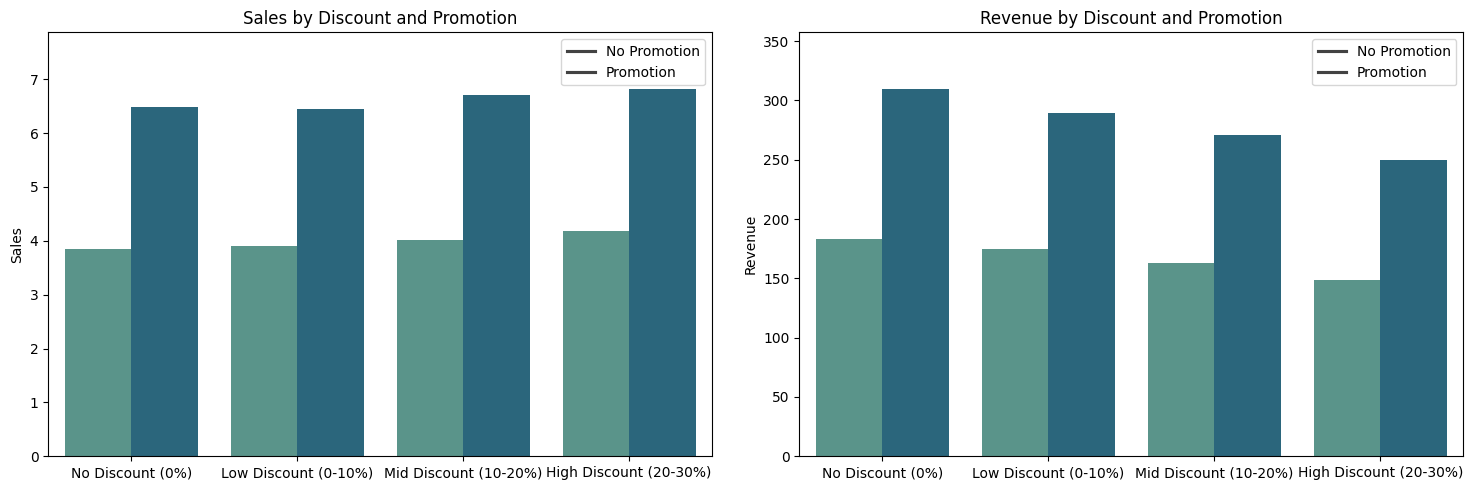

In [62]:
# Visualize results as catplot.
fig, ax = plt.subplots(1, 2, figsize=(15,5))

# Sales catplot.
sns.barplot(
    avg_comb_df, ax=ax[0],
    x='disc_group', y='net_units', hue='promo_group',
    palette='crest'
)
ax[0].set_title('Sales by Discount and Promotion')
ax[0].set_xlabel('')
ax[0].set_ylabel('Sales')
ax[0].set_xticks([0, 1, 2, 3], ['No Discount (0%)', 'Low Discount (0-10%)', 'Mid Discount (10-20%)', 'High Discount (20-30%)'])
ax[0].legend(title='', labels=['No Promotion', 'Promotion'])
pad_ylim(ax[0])

# Revenue catplot.
sns.barplot(
    avg_comb_df, ax=ax[1],
    x='disc_group', y='net_revenue', hue='promo_group',
    palette='crest'
)
ax[1].set_title('Revenue by Discount and Promotion')
ax[1].set_xlabel('')
ax[1].set_ylabel('Revenue')
ax[1].set_xticks([0, 1, 2, 3], ['No Discount (0%)', 'Low Discount (0-10%)', 'Mid Discount (10-20%)', 'High Discount (20-30%)'])
ax[1].legend(title='', labels=['No Promotion', 'Promotion'])
pad_ylim(ax[1])

plt.tight_layout()
plt.show()

As shown above, the combination of discount and promotion produces varying effects on sales and revenue. A high discount combined with promotion results in the highest sales, while no discount with promotion yields the highest revenue. This finding affirms the results from the previous sections that promotion has a stronger positive impact on both sales and revenue.

## 10. Does online transaction affect the customer experience (returns and rating)?

Get the necessary columns from the preprocessed data.

In [63]:
# Each row is confirmed unique from the previous step so we can exclude the `date` in this section.
# Customer experience varies between stores.
# Therefore, we need to include store ID data to analyze online transaction effect to customer experience.
# Copy to ensure every change made in this section doesn't affect the main data.
df_10 = df[['store_id', 'online','returns','avg_rating']].copy()
print(df_10.head())

   store_id  online  returns  avg_rating
0  store_09       1        1        3.41
1  store_02       0        0        3.59
2  store_06       0        0        3.86
3  store_06       0        1        4.71
4  store_02       0        0        3.86


Separate data by store ID to support store-based analysis process and to ensure every store carries equal weights.

In [64]:
cx_dfs = {}
separate(df_10, cx_dfs, 'store_id')

In [65]:
# Output examples.
print('store_09:\n',cx_dfs['store_09'].head())
print('store_02:\n',cx_dfs['store_02'].head())
print('store_06:\n',cx_dfs['store_06'].head())

store_09:
         online  returns  avg_rating
131520       1        0        4.27
131521       0        0        4.37
131522       0        0        4.57
131523       0        0        3.88
131524       0        0        3.46
store_02:
        online  returns  avg_rating
16440       0        0        4.34
16441       1        0        4.25
16442       0        0        4.60
16443       1        0        4.23
16444       1        0        4.31
store_06:
        online  returns  avg_rating
82200       0        0        4.29
82201       1        0        4.05
82202       0        0        4.06
82203       0        0        4.42
82204       0        0        3.23


Find the mean difference percentages between variables (`online`, `returns`, and `avg_rating`) to analyze the effect of online transaction to customer experience.

In [66]:
cx_dfs_mdiff = cx_dfs.copy()
print("Effect of Online Transaction to Each Store's Customer Experience by Mean Difference Percentages:")
for store_id, df_cx in cx_dfs_mdiff.items():
    df_cx = {
        'returns': binary_mean_diff(df_cx, condition='online', mode='returns'), 
        'avg_rating': binary_mean_diff(df_cx, condition='online', mode='avg_rating')}
    df_cx = pd.DataFrame([df_cx])
    cx_dfs_mdiff[store_id] = df_cx

cx_mdiff = dfs_to_df(cx_dfs_mdiff, 'store_id')
print(cx_mdiff.head())

Effect of Online Transaction to Each Store's Customer Experience by Mean Difference Percentages:
   store_id   returns  avg_rating
0  store_01  6.175775    0.196246
1  store_02 -0.635270    0.195945
2  store_03 -9.967616    0.091898
3  store_04  1.532910    0.183192
4  store_05  7.230985    0.087731


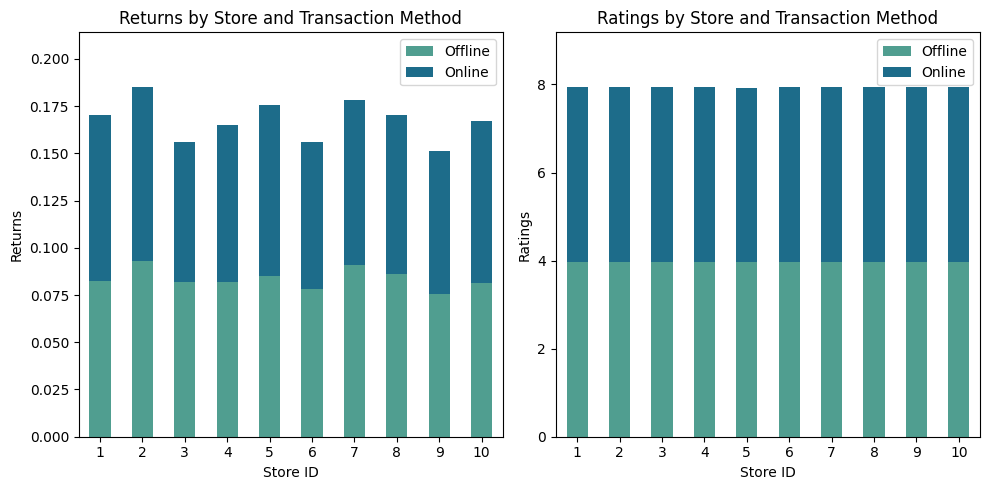

In [67]:
# Visualize results as stacked bar plot.
pivot_returns = (
    df_10.groupby(['store_id', 'online'])[['returns']]
      .mean()
      .unstack(fill_value=0)
)
pivot_returns.columns = ['Offline', 'Online']

pivot_ratings = (
    df_10.groupby(['store_id', 'online'])[['avg_rating']]
      .mean()
      .unstack(fill_value=0)
)
pivot_ratings.columns = ['Offline', 'Online']

fig, ax = plt.subplots(1, 2, figsize=(10,5))

# Returns stacked bar plot.
plot_stackedbar(
    pivot_returns, 
    'Returns by Store and Transaction Method',
    'Store ID', 'Returns',
    10, ax=ax[0])

# Ratings stacked bar plot.
plot_stackedbar(
    pivot_ratings, 
    'Ratings by Store and Transaction Method',
    'Store ID', 'Ratings',
    10, ax=ax[1])

plt.tight_layout()
plt.show()

Calculate average mean difference percentages for each store.

In [68]:
cx_mat = []

avg_cx_df = avg_dfitem(store_id, df_cx, cx_dfs_mdiff, cx_mat)
print(f"Average effect of online transaction on returns number: {avg_cx_df['returns'][0]:.2f}%")
print(f"Average effect of online transaction on ratings: {avg_cx_df['avg_rating'][0]:.2f}%")

Average effect of online transaction on returns number: 0.25%
Average effect of online transaction on ratings: 0.13%


As shown above, online transactions slightly affect both returns and ratings in a directly proportional manner. This is a surprising result, as an increase in returns usually corresponds to lower ratings.